<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/21%20-%20Sklearn%20%3A%20Model%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4. Evaluation des performances
# TP4.2. La  Validation croisée :  cross validation

**Rappel** : 
L'évaluation des perfomances d'un algotrithme d'apprentissage ne se fait JAMAIS sur les données utilisées pour l'apprentissage. La solution est de faire un split en tran et test MAIS

Le **split train et test**  peut conduire à un biais dans certains cas.
En effet, même si ce choix est effectué aléatoirement il peut conduire  un biais, liées au fait que pour peut être pour les données de test choisies le système performe bien juste par chance.

Pour éviter cela, on fait de l'évaluation croisée (**cross validation**).
On découpe le Dataset en pluieurs sous ensemble (on parle de $K$ fold) à ne pas confondre avec le $k$ de KNN.

Pat exemple $K=5$, sous ensemble 
chaque sous sousemble va servir de test peanant que les 4 autres servent pour entrainer le modèle.



## 1. Validation croisée - Cross validation (kfold)

On va utiliser **cross_val_score** du Module **sklearn.model_selection**<br>
cross_val_score(le modèle, X_train, y_train, cv='nombre de fold (le K)', scoring='la métrique')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris , load_diabetes #IRIS est un dataset comportant des images de
from sklearn.preprocessing import RobustScaler


### Le Dataset
On repart sur les données du Titanic

In [48]:
# le dataset titanic 
import pandas as pd 
titanic = pd.read_csv('../data/titanic.csv')

# On prend juste une partie du fichier.
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
#  on regrade les chance de Survived  en fonction des autres features.
X_features=['Pclass', 'Sex', 'Age']
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

y = titanic['Survived'] # récupérer la colonne survived et la mettre dans y

# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = titanic.drop('Survived', axis=1)

X = RobustScaler().fit_transform(X)

### Choix un modèle 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

### Cross validation
Rien de particulier à faire, la fonction **cross_val_score(model, X, y, cv=(?? (5 par exemple), scoring='accuracy')** FAIT TOUT
- split en cv folds
-  entraine, et test sur chacun des folds puis elle affiche les scores en fonction de "scoring" choisi. 

In [50]:
#choix du 
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5, scoring='accuracy') # cross val score renvoie un tableau de score par fold

array([0.8041958 , 0.81818182, 0.82517483, 0.7972028 , 0.82394366])

### Trouver la valeur de k du knn qui donne le meilleur score ? 
cross_val_score(..) renvoie un tableau, un score par fold. On doit faire la moyenne des *accuracy*.!!!<br>
Voir comment faire sur  sklearn. (cross_val_score(..)/mean calcule cette moyenne

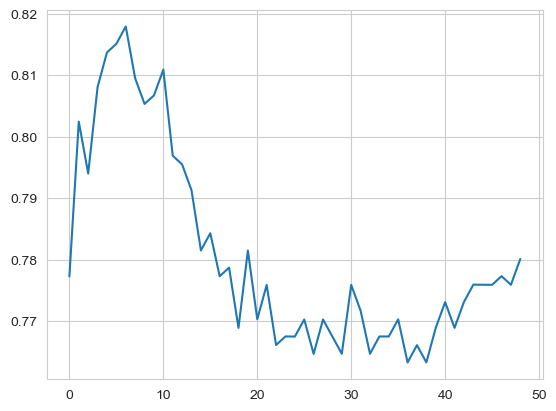

In [51]:
## On fait une cross validation cv=5 5 folds 
### on tste différentes valeurs de k k entre 1 et 50.
# le k c'est comme si on plaçait un point dans l'espace et on regarde les k plus proches voisins
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X, y, cv=5).mean() # ici le but est de trouver le meilleur k ou la meilleure moyenne de score sur le meilleur k et cv = 5, cv signifie cross validation
    val_score.append(score)

plt.plot(val_score)

###  Validation Curve 
Inutile de faire la boucle for, la méthode **validation_curve** de **sklearn.model_selection** permet de faire ce choix automatiquement


In [52]:
from sklearn.model_selection import validation_curve

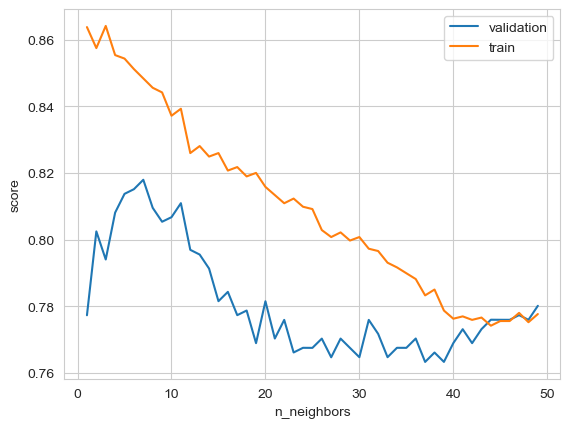

In [53]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X, y,param_name='n_neighbors', param_range=k, cv=5, scoring="accuracy")

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### Learning Curve

Evolution en fonction de a quantité de données utilisées pour le train données


In [54]:
from sklearn.model_selection import learning_curve

[ 57 114 171 228 285 342 399 456 513 571]


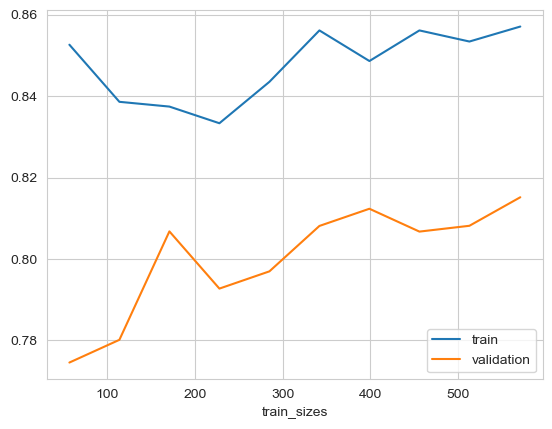

In [55]:
N,train_score, val_score = learning_curve(model, X, y,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Exercice :
Reprendre l'exercice 1 du TP 4.1, comparer les résultats obtenus par le modèle dans les deux cas suivants :  un simple découpage en 80/20% et une validation croisée en 5 folds.


In [72]:
from sklearn.model_selection import train_test_split

data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
X = data[:,:4]
y = data[:,4] # X soit les 4 premières colonnes, y la dernière colonne
# récupérer toutes les lgnes data[:, et les 4 premières colonnes data[ ..,:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [73]:
# regression linéaire 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9344663298120052

In [77]:
# cross validation
model = LinearRegression()
cross_val_score(model, X, y, cv=5, scoring='r2').mean()

0.9476158220896481